In [1]:
import pandas as pd

In [2]:
# 导入数据
text_ana = pd.read_excel(r'D:\text analysis\weibo_pure.xlsx')

In [3]:
text_ana

,内容
0,天呐！我被渣了？！恋爱无数次 竟然又遇渣男为了你们不被骗海后黎女士教你们三步识渣男！快快收藏...
1,难怪恐婚的越来越多，结婚的越来越少！看了这结婚协议，真是惊呆了！⭕️年轻人对待爱情都这么冷漠...
2,奋不顾身的投入一段感情但却被伤透了心或许这就是年轻人恐婚的源头吧！视频来源｜乔七月L蟹老板爱...
3,爸爸：“你不结婚，他不结婚，那人类不灭绝了吗？”00后女儿：“那恐龙也生孩子，不也灭绝了吗。...
4,我大概是一个很自私的人，我觉得结婚和生小孩会耽误我爱自己，也有可能是觉得自身能力支撑不住对自...
...,...
1041,南京的小可爱们，你觉得有哪些呢？2南京​
1042,在一回首间，才忽然发现，原来，我一生的种种努力，不过只为了要使周遭的人都对我满意而已。为了要...
1043,单身万岁！无拘无束！想干啥干啥！不用担心别人的想法！ ​
1044,胆小（既然是年轻人就应该多尝试） ​


In [4]:
import jieba

In [5]:
# 自定义停用词表
stopwords = [ '恐婚','结婚','婚姻','没有','年轻人','一个','的', '了', '和', '是', '就', '都', '而', '及', '与', '这', '那', '在', '有', 
    '我', '你', '他', '她', '它', '我们', '他们', '其实', '很多', '不会', '不能', 
    '知道', '看到', '需要', '感觉', '如果', '那个', '已经', '还有', '怎么', '遇到',
    '应该', '想要', '认为', '或者', '甚至', '一直', '不要', '所有', '永远', '不敢',
    '只是', '只有', '虽然', '面对', '特别', '一种', '可是', '各种', '还要', '以为', 
    '好像', '成为', '真正', '这些', '不过', '带来', '必须', '无论', '每个', '足够', 
    '出现', '反而', '变成', '多少', '容易', '愿意', '一切', '不了', '不够', '东西', 
    '于是', '怎样', '一些', '不到', '不愿', '原来', '只会', '告诉', '导致', '放弃', 
    '确定', '结束', '结果', '而且', '讨论', '那种', '麻烦', '一点', '不仅', '之间', 
    '大家', '如何', '总是', '我会', '曾经', '状态', '程度', '经历', '解决', '除了', 
    '问题', '事情', '视频', '两个', '对方', '希望', '今天', '每天', '突然', '一样', 
    '不如', '有人', '发现', '超话', '而已', '那些', '重要', '想法', '技巧', '准备', 
    '微博', '觉得', '原因', '真的', '为什么', '因为', '什么', '就是', '不是', '但是',
    '真的', '可能', '这个', '那么', '现在', '可以', '不想', '害怕','还是', '所以', 
    '这样', '当代', '为了', '老公', '男人','最后', '主要', '然后', '究竟','产生', 
    '一定', '这么', '这种', '大概', '身边', '一起', '喜欢', '时候']

def word_segmentation(text):
    words = jieba.cut(text, cut_all=False)
    filtered_words = [word for word in words if word not in stopwords and word.strip() != '']
    return ' '.join(filtered_words)

# 应用到文本列
text_ana['内容'] = text_ana['内容'].apply(word_segmentation)
text_ana[['内容']]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\SHANGS~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.848 seconds.
Prefix dict has been built successfully.


,内容
0,天呐 ！ 被 渣 ？ ！ 恋爱 无数次 竟然 又 遇渣 男 你们 不 被 骗海 后黎 女士 ...
1,难怪 越来越 多 ， 越来越少 ！ 看 协议 ， 真是 惊呆 ！ ⭕ ️ 对待 爱情 冷漠 ...
2,奋不顾身 投入 一段 感情 但 却 被 伤 透了心 或许 源头 吧 ！ 来源 ｜ 乔 七月 ...
3,爸爸 ： “ 不 ， 不 ， 人类 不 灭绝 吗 ？ ” 00 后 女儿 ： “ 恐龙 也 ...
4,很 自私 人 ， 生小孩 会 耽误 爱 自己 ， 也 自身 能力 支撑 不住 对 自己 小孩...
...,...
1041,南京 小可爱 们 ， 哪些 呢 ？ 2 南京 ​
1042,一 回首 间 ， 才 忽然 ， ， 一生 种种 努力 ， 只 要 使 周遭 人 对 满意 。...
1043,单身 万岁 ！ 无拘无束 ！ 想 干 啥 干 啥 ！ 不用 担心 别人 ！ ​
1044,胆小 （ 既然 多 尝试 ） ​


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
# 初始化CountVectorizer
vectorizer = CountVectorizer()

In [8]:
# 将文本数据转化为词袋特征矩阵
X = vectorizer.fit_transform(text_ana['内容'].dropna())

In [9]:
# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (1046, 5783)


In [10]:
# 展示词袋模型中的所有特征词
print('特征词列表:',vectorizer.get_feature_names_out())

特征词列表: ['00' '0218' '0250' ... '鼓励' '齐眉举案' '龙湖']


In [11]:
len(vectorizer.get_feature_names_out())

5783

In [12]:
X

<1046x5783 sparse matrix of type '<class 'numpy.int64'>'
	with 13646 stored elements in Compressed Sparse Row format>

In [13]:
feature_words = vectorizer.get_feature_names_out()

In [14]:
feature_words.shape

(5783,)

In [15]:
X.sum(axis=0).shape

(1, 5783)

In [16]:
X.sum(axis=0)[0]

matrix([[11,  1,  1, ...,  1,  1,  1]], dtype=int64)

In [17]:
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [18]:
word_freq

{'00': 11,
 '0218': 1,
 '0250': 1,
 '04': 1,
 '0601': 1,
 '09': 1,
 '10': 4,
 '100': 1,
 '10w': 1,
 '11': 4,
 '12': 2,
 '13': 1,
 '14': 1,
 '15': 4,
 '16': 1,
 '18': 3,
 '19': 2,
 '20': 8,
 '2018': 1,
 '2019': 5,
 '2020': 5,
 '2021': 1,
 '2022': 1,
 '2024': 1,
 '21': 5,
 '22': 3,
 '23': 3,
 '24': 4,
 '25': 7,
 '26': 3,
 '27': 4,
 '28': 3,
 '29': 1,
 '30': 17,
 '333': 2,
 '364': 1,
 '3w': 1,
 '40': 1,
 '40w': 2,
 '50': 2,
 '500': 1,
 '50w': 2,
 '520': 1,
 '60': 1,
 '63': 1,
 '67': 1,
 '6k': 1,
 '80': 4,
 '8000': 1,
 '8023': 1,
 '82': 1,
 '90': 9,
 '95': 6,
 '962': 1,
 '98': 1,
 '99': 1,
 '996': 1,
 'allofyoursecrets': 1,
 'allsodaconch': 1,
 'and': 1,
 'angelababy': 2,
 'baby': 1,
 'body': 1,
 'cc': 1,
 'chilling': 1,
 'choice': 1,
 'cp': 3,
 'did': 2,
 'emm': 1,
 'emmmmmmm': 1,
 'emo': 1,
 'everyday': 2,
 'fish': 1,
 'get': 1,
 'girl': 1,
 'grant': 1,
 'he': 1,
 'hhh': 1,
 'him': 1,
 'honeymoon': 1,
 'hot': 1,
 'hugh': 1,
 'ice': 1,
 'ipad': 1,
 'iphone13': 1,
 'ipod': 1,
 'it': 1,
 'j

In [19]:
word_freq.items()

dict_items([('00', 11), ('0218', 1), ('0250', 1), ('04', 1), ('0601', 1), ('09', 1), ('10', 4), ('100', 1), ('10w', 1), ('11', 4), ('12', 2), ('13', 1), ('14', 1), ('15', 4), ('16', 1), ('18', 3), ('19', 2), ('20', 8), ('2018', 1), ('2019', 5), ('2020', 5), ('2021', 1), ('2022', 1), ('2024', 1), ('21', 5), ('22', 3), ('23', 3), ('24', 4), ('25', 7), ('26', 3), ('27', 4), ('28', 3), ('29', 1), ('30', 17), ('333', 2), ('364', 1), ('3w', 1), ('40', 1), ('40w', 2), ('50', 2), ('500', 1), ('50w', 2), ('520', 1), ('60', 1), ('63', 1), ('67', 1), ('6k', 1), ('80', 4), ('8000', 1), ('8023', 1), ('82', 1), ('90', 9), ('95', 6), ('962', 1), ('98', 1), ('99', 1), ('996', 1), ('allofyoursecrets', 1), ('allsodaconch', 1), ('and', 1), ('angelababy', 2), ('baby', 1), ('body', 1), ('cc', 1), ('chilling', 1), ('choice', 1), ('cp', 3), ('did', 2), ('emm', 1), ('emmmmmmm', 1), ('emo', 1), ('everyday', 2), ('fish', 1), ('get', 1), ('girl', 1), ('grant', 1), ('he', 1), ('hhh', 1), ('him', 1), ('honeymoon',

In [20]:
# 观察词袋模型的词频技术结果 True从大到小
sorted(word_freq.items(),key=lambda x: x[1], reverse=True)

[('自己', 302),
 ('孩子', 180),
 ('生活', 120),
 ('家庭', 73),
 ('离婚', 73),
 ('单身', 65),
 ('爱情', 64),
 ('父母', 63),
 ('越来越', 60),
 ('恐惧', 57),
 ('婚后', 56),
 ('我怕', 56),
 ('幸福', 54),
 ('女人', 51),
 ('女性', 51),
 ('开始', 51),
 ('家暴', 49),
 ('恐育', 48),
 ('以后', 47),
 ('恋爱', 47),
 ('感情', 47),
 ('不好', 45),
 ('别人', 44),
 ('日常', 42),
 ('选择', 42),
 ('社会', 41),
 ('妈妈', 40),
 ('一天', 38),
 ('出轨', 38),
 ('谈恋爱', 38),
 ('工作', 36),
 ('对象', 35),
 ('吵架', 34),
 ('未来', 33),
 ('人生', 32),
 ('压力', 31),
 ('照顾', 31),
 ('时间', 30),
 ('之后', 29),
 ('到底', 29),
 ('心里', 28),
 ('朋友', 28),
 ('女生', 27),
 ('担心', 27),
 ('自由', 26),
 ('可怕', 25),
 ('安全感', 25),
 ('失去', 24),
 ('婆媳关系', 24),
 ('男方', 24),
 ('一瞬间', 23),
 ('小孩', 23),
 ('一生', 22),
 ('情感', 22),
 ('是不是', 22),
 ('是因为', 22),
 ('相亲', 22),
 ('关系', 21),
 ('婆婆', 21),
 ('彩礼', 21),
 ('能力', 21),
 ('责任', 21),
 ('一下', 20),
 ('丈夫', 20),
 ('婚前', 20),
 ('无法', 20),
 ('世界', 19),
 ('家里', 19),
 ('恐惧感', 19),
 ('母亲', 19),
 ('理由', 19),
 ('话题', 19),
 ('做饭', 18),
 ('催婚', 18),
 ('婚礼', 18),
 ('教育', 18),


In [21]:
# 将排序后的词频结果转换为 DataFrame
freq_df = pd.DataFrame(sorted(word_freq.items(), key=lambda x: x[1], reverse=True),
                       columns=['词语', '频数'])

# 显示前 50 个高频词
freq_df.head(51)

# 设置输出路径
output_path = r"D:\text analysis\high_freq_words.xlsx"

# 导出为 Excel 文件
freq_df.head(51).to_excel(output_path, index=False, engine='openpyxl')

print(f"高频词表已成功导出到：{output_path}")

高频词表已成功导出到：D:\text analysis\high_freq_words.xlsx


In [22]:
from wordcloud import WordCloud

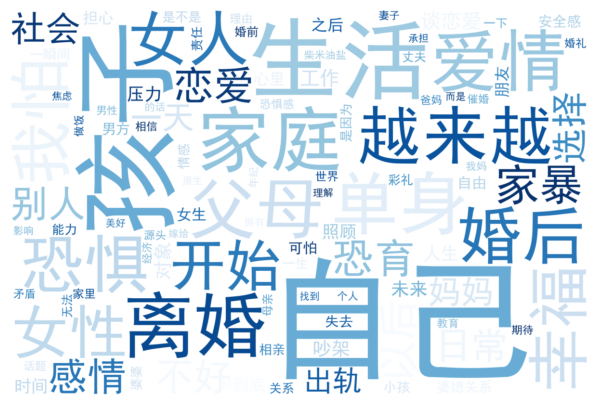

In [23]:
import matplotlib.pyplot as plt

wc = WordCloud(
    width=1200,
    height=800,
    max_words=100, #设置最大显示的词数
    colormap='Blues',
    background_color='white'
    ,font_path='simhei.ttf'
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10,5))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# 保存词云为 PNG 文件
wc.to_file(r'D:\text analysis\wordcloud.png')

# 显示词云图
plt.show()